In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def mlp(L, n_list, activation, Cb, Cw):
    model = tf.keras.Sequential()

    #Creo gli inizializzatori -> oggetti necessari a inizializzare i pesi W (chiamati kernel) e i bias
    kernel_initializers_list = []
    kernel_initializers_list.append(tf.keras.initializers.RandomNormal(0, math.sqrt(Cw/n_list[0])))
    for l in range(1, L): 
        kernel_initializers_list.append(tf.keras.initializers.RandomNormal(0, math.sqrt(Cw/n_list[l])))
    kernel_initializers_list.append(tf.keras.initializers.RandomNormal(0, math.sqrt(Cw/n_list[L])))
    bias_initializer = tf.keras.initializers.RandomNormal(stddev=math.sqrt(Cb))

    #Aggiungo gli strati al modello: Dense e' il classico strato pieno di neuroni
    model.add(tf.keras.layers.Dense(n_list[1], input_shape=[n_list[0]], use_bias = True, kernel_initializer = kernel_initializers_list[0],
              bias_initializer = bias_initializer))
    for l in range(1, L): 
        model.add(tf.keras.layers.Dense(n_list[l+1], activation=activation, use_bias = True, kernel_initializer = kernel_initializers_list[l],
                  bias_initializer = bias_initializer))
    model.add(tf.keras.layers.Dense(n_list[L+1], use_bias = True, kernel_initializer = kernel_initializers_list[L],
                  bias_initializer = bias_initializer))
    print(model.summary())
    return model

In [3]:
def createData(seed, n_0, m, model_number, error_variance):
    keys = np.random.RandomState(seed = seed)

    if model_number == 1:
        X = np.random.multivariate_normal(np.zeros(n_0), np.eye(n_0), size=(m,))
       # X = np.sort(X, axis = 0)
        beta = np.random.uniform(low=-50, high=  100, size=(n_0+1,))

        error = np.random.multivariate_normal( np.zeros(m), error_variance*np.eye(m), size=(1,))
        print("beta = ",  beta)
      #  y = jnp.dot(X, beta[1:]) + + beta[0] + error.T
        y = X.dot(beta[1:]).reshape((m,n_0)) + beta[0] + error.T
      
        return X,y

In [4]:
#X, y = createData(0, 1, 100, 1, 1)

In [5]:
X = np.array([[ 1.4229934 ],
       [-0.7694232 ],
       [ 0.18693154],
       [-1.8928823 ],
       [ 0.8390223 ],
       [-0.80786455],
       [-1.1990117 ],
       [ 1.7281239 ],
       [ 0.6514684 ],
       [-0.18889305],
       [-1.7007519 ],
       [ 0.4624187 ],
       [-1.4208488 ],
       [ 2.0488164 ],
       [ 0.18885063],
       [ 0.26335493],
       [-1.2319794 ],
       [ 0.57641345],
       [ 1.4143786 ],
       [-0.18824942],
       [ 0.6712429 ],
       [ 1.9626212 ],
       [-0.6380914 ],
       [ 1.6973408 ],
       [ 1.1379755 ],
       [-0.06424444],
       [ 0.03995398],
       [ 0.7607389 ],
       [ 1.5491706 ],
       [ 0.45916963],
       [-0.42302114],
       [-0.22891377],
       [-0.9554228 ],
       [-0.72487444],
       [-0.44829613],
       [-1.6084336 ],
       [-0.00515358],
       [-0.46755362],
       [-0.63108253],
       [ 1.4433128 ],
       [ 0.09611866],
       [ 0.1519512 ],
       [-0.21378434],
       [-0.3947631 ],
       [ 1.8151172 ],
       [ 1.3990598 ],
       [-0.38444638],
       [-0.45884144],
       [-0.02543407],
       [ 0.1947339 ],
       [ 1.2576802 ],
       [-0.49022987],
       [-0.48774967],
       [ 0.5709151 ],
       [-0.62209004],
       [ 1.1585314 ],
       [-0.61611164],
       [-0.853702  ],
       [-1.9548331 ],
       [ 0.09757172],
       [-0.7471279 ],
       [ 0.14180093],
       [-0.73419815],
       [ 1.3191959 ],
       [-0.5761279 ],
       [ 0.2514541 ],
       [ 0.79598933],
       [-0.5963267 ],
       [-0.28341734],
       [ 0.38109946],
       [-0.2282071 ],
       [-0.5496032 ],
       [ 0.33840123],
       [ 1.881508  ],
       [-0.1858809 ],
       [ 1.5156671 ],
       [-0.71115583],
       [-1.2660422 ],
       [-0.7562617 ],
       [-0.08545087],
       [ 0.27632588],
       [ 1.6856902 ],
       [-0.44601882],
       [ 2.587651  ],
       [ 0.78883994],
       [ 0.8980923 ],
       [ 2.0546176 ],
       [ 1.4392779 ],
       [ 0.826575  ],
       [-0.02757164],
       [-0.95617485],
       [-0.65805084],
       [ 0.3751643 ],
       [ 0.7270253 ],
       [ 0.28862196],
       [-0.55771255],
       [ 1.1139343 ],
       [-0.4713115 ],
       [-0.30672675],
       [-0.91346914]])

In [6]:
y = np.array([[ -96.36676  ],
       [ -17.848995 ],
       [ -52.647736 ],
       [  20.776796 ],
       [ -72.78775  ],
       [ -15.545514 ],
       [  -3.3958688],
       [-106.27772  ],
       [ -67.76811  ],
       [ -38.206234 ],
       [  14.274464 ],
       [ -62.74348  ],
       [   5.592495 ],
       [-116.78298  ],
       [ -53.314274 ],
       [ -53.27179  ],
       [  -1.1411812],
       [ -62.970932 ],
       [ -94.354904 ],
       [ -38.586704 ],
       [ -68.538445 ],
       [-112.86392  ],
       [ -22.652624 ],
       [-102.99926  ],
       [ -83.839165 ],
       [ -42.152214 ],
       [ -44.903263 ],
       [ -70.885864 ],
       [ -97.29062  ],
       [ -57.776115 ],
       [ -32.12645  ],
       [ -36.544815 ],
       [ -10.839234 ],
       [ -19.714369 ],
       [ -27.709055 ],
       [  11.107928 ],
       [ -44.628773 ],
       [ -28.248579 ],
       [ -23.791153 ],
       [ -94.35395  ],
       [ -47.045208 ],
       [ -50.967876 ],
       [ -37.87078  ],
       [ -30.886461 ],
       [-109.433105 ],
       [ -95.02953  ],
       [ -31.650303 ],
       [ -28.934679 ],
       [ -43.025997 ],
       [ -53.057724 ],
       [ -87.71894  ],
       [ -27.471378 ],
       [ -29.154205 ],
       [ -64.24519  ],
       [ -22.715006 ],
       [ -83.91665  ],
       [ -25.051847 ],
       [ -16.129763 ],
       [  23.871988 ],
       [ -46.712833 ],
       [ -19.295914 ],
       [ -50.223335 ],
       [ -19.131683 ],
       [ -90.35635  ],
       [ -23.285646 ],
       [ -51.75896  ],
       [ -71.9968   ],
       [ -24.174744 ],
       [ -36.340866 ],
       [ -57.7881   ],
       [ -35.786766 ],
       [ -25.58188  ],
       [ -56.251522 ],
       [-111.275154 ],
       [ -39.119453 ],
       [ -99.110504 ],
       [ -19.99335  ],
       [  -0.8735297],
       [ -18.850683 ],
       [ -43.141254 ],
       [ -54.445007 ],
       [-104.783424 ],
       [ -28.28434  ],
       [-134.93835  ],
       [ -73.10167  ],
       [ -76.27928  ],
       [-117.71327  ],
       [ -96.39233  ],
       [ -73.58957  ],
       [ -44.99873  ],
       [ -12.710113 ],
       [ -21.779875 ],
       [ -58.46139  ],
       [ -69.609116 ],
       [ -55.20095  ],
       [ -25.23826  ],
       [ -82.964775 ],
       [ -28.140932 ],
       [ -33.79203  ],
       [ -11.98914  ]])

In [7]:
model = mlp(1, [1,10,1], "relu", 1, 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [8]:
W_0 = [-0.7645158 , -0.0250984 , -1.133804  , -0.03829474, -0.13075697,
          -0.11048132,  1.0224955 , -0.9789039 ,  0.81434107,  0.28093112]
b_0 = [-0.11460838,
         -0.3517475 ,
          0.12212043,
          0.47735927,
          0.34522718,
         -0.5399481 ,
         -0.16559786,
         -0.24302545,
          0.09792899,
          0.5944655 ]
W_1 = [-1.1232858 ,  1.0349628 ,  0.97679436, -0.18153423,  0.7232132 ,
           0.4670005 , -0.36788744,  0.2350446 , -0.3958354 ,  0.8658353 ]
b_1 = [-0.18262307]

In [9]:
model.set_weights([np.array([W_0], dtype='f'), np.array(b_0, dtype='f'), np.array([W_1], dtype='f').T, np.array(b_1, dtype='f')])

In [10]:
model.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.SGD(learning_rate = 0.00001))
model.fit(X, y, batch_size = X.shape[0], epochs = 5000)

Output streaming troncato alle ultime 5000 righe.
Epoch 1158/5000
1/1 [==============================] - 0s 3ms/step - loss: 1133.4727
Epoch 1159/5000
1/1 [==============================] - 0s 8ms/step - loss: 1131.0227
Epoch 1160/5000
1/1 [==============================] - 0s 9ms/step - loss: 1128.5747
Epoch 1161/5000
1/1 [==============================] - 0s 3ms/step - loss: 1126.1288
Epoch 1162/5000
1/1 [==============================] - 0s 5ms/step - loss: 1123.6851
Epoch 1163/5000
1/1 [==============================] - 0s 3ms/step - loss: 1121.2433
Epoch 1164/5000
1/1 [==============================] - 0s 3ms/step - loss: 1118.8037
Epoch 1165/5000
1/1 [==============================] - 0s 5ms/step - loss: 1116.3657
Epoch 1166/5000
1/1 [==============================] - 0s 9ms/step - loss: 1113.9302
Epoch 1167/5000
1/1 [==============================] - 0s 3ms/step - loss: 1111.4966
Epoch 1168/5000
1/1 [==============================] - 0s 4ms/step - loss: 1109.0652
Epoch 1169/5000

4/4 [==============================] - 0s 2ms/step


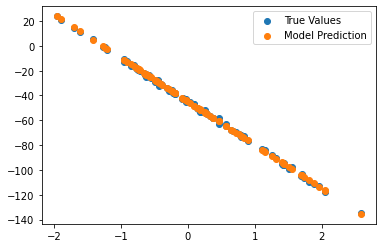

In [12]:
plt.scatter(X, y, label = 'True Values')
plt.scatter(X, model.predict(X), label='Model Prediction')
plt.legend();